# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [2]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [3]:
def f(x):
    return numpy.sin(x)*x**2


Ensure your function works with numpy arrays:

In [4]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [5]:
def g(x):
    return -x**2*numpy.cos(x)+2*x*numpy.sin(x)+2*numpy.cos(x)-2

Check your solution with the same numpy array:

In [6]:
assert g(0) == 0.

In [7]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [8]:
def integrate_analytic(xmin, xmax):
    return g(xmax)-g(xmin)


Check your analytic function:

In [9]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [10]:
def integrate_numeric(xmin, xmax, N):
    
    dx=(xmax-xmin)/N
    sum=0
    for i in range(1,N):
       sum=sum+2*f(xmin+i*dx)+4*f((xmin+i*dx+xmin+(i-1)*dx)/2)
    
    sum=sum+f(xmin)+f(xmax)+4*f((xmax*2-dx)/2)
    
    return sum*dx/6
    

Make sure you have implemented Simpson's rule correctly:

In [11]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [12]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


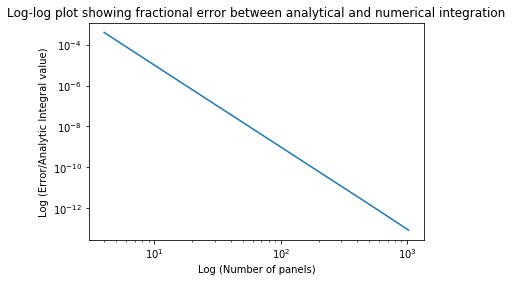

In [22]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1) # Define reference value from analytical solution

a=numpy.array([])
for i in range(0,len(panel_counts)):
    a=numpy.append(a,integrate_analytic(x0,x1))

n=numpy.array([])
for i in range(0,len(panel_counts)):
    n=numpy.append(n,integrate_numeric(x0,x1,panel_counts[i]))
    
err=a
err=err-n
err/a
    
plt.loglog(panel_counts,err,label="Analytic Integration")
plt.ylabel("Log (Error/Analytic Integral value)")
plt.xlabel("Log (Number of panels)")

plt.title("Log-log plot showing fractional error between analytical and numerical integration")
plt.savefig("question1")



What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

More panels lower the error between the analytical and numerical method. This is logical since analytical method has infinite amount of panels. So more panels for numerical method brings it closer to the analytical value with error becoming smaller and smaller.

However, in reality there is a limit on memory and processing power and after the 10000th panel the error actually starts increasing. This is because with large amount of panels the log(error) becomes very small and as it was explained in the previous assignment, errors start appearing when calculating with very small numbers. 

If the trapezium rule was being used, how would the panel
count affect accuracy? 

Again the error would decrease linearly with the increase in the number of panels. The slope is smaller and it takes a lot more panels to achieve small error as with the Simpson method. It is unlikely that enough panels will be included in the calculation to reach errors small enough to start giving wrong results. 